In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

### Load data from file

In [2]:
dir = 'AAPL.json'

In [3]:
if os.path.exists(dir):
    with open(dir) as f:
        df = pd.read_json(dir)
else:
    raise SystemExit("File not found!")

In [4]:
df.head()

Open      High       Low     Close     Volume  \
1980-12-12 05:00:00  0.099584  0.100017  0.099584  0.099584  469033600   
1980-12-15 05:00:00  0.094821  0.094821  0.094388  0.094388  175884800   
1980-12-16 05:00:00  0.087893  0.087893  0.087461  0.087461  105728000   
1980-12-17 05:00:00  0.089625  0.090058  0.089625  0.089625   86441600   
1980-12-18 05:00:00  0.092224  0.092657  0.092224  0.092224   73449600   

                     Dividends  Stock Splits  
1980-12-12 05:00:00        0.0             0  
1980-12-15 05:00:00        0.0             0  
1980-12-16 05:00:00        0.0             0  
1980-12-17 05:00:00        0.0             0  
1980-12-18 05:00:00        0.0             0

### Describe data

In [5]:
df.describe()

Open          High           Low         Close        Volume  \
count  10705.000000  10705.000000  10705.000000  10705.000000  1.070500e+04   
mean      17.081505     17.276056     16.894096     17.093375  3.251422e+08   
std       37.120745     37.565579     36.704398     37.156512  3.372257e+08   
min        0.038535      0.038535      0.038102      0.038102  0.000000e+00   
25%        0.238614      0.244164      0.233235      0.239002  1.191904e+08   
50%        0.409794      0.417382      0.402205      0.410249  2.123508e+08   
75%       15.288462     15.413618     15.148630     15.265679  4.047120e+08   
max      181.048914    181.356227    177.569291    180.434280  7.421641e+09   

          Dividends  Stock Splits  
count  10705.000000  10705.000000  
mean       0.000682      0.001588  
std        0.010957      0.084800  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        0.240000      7.000000

### Price and volume

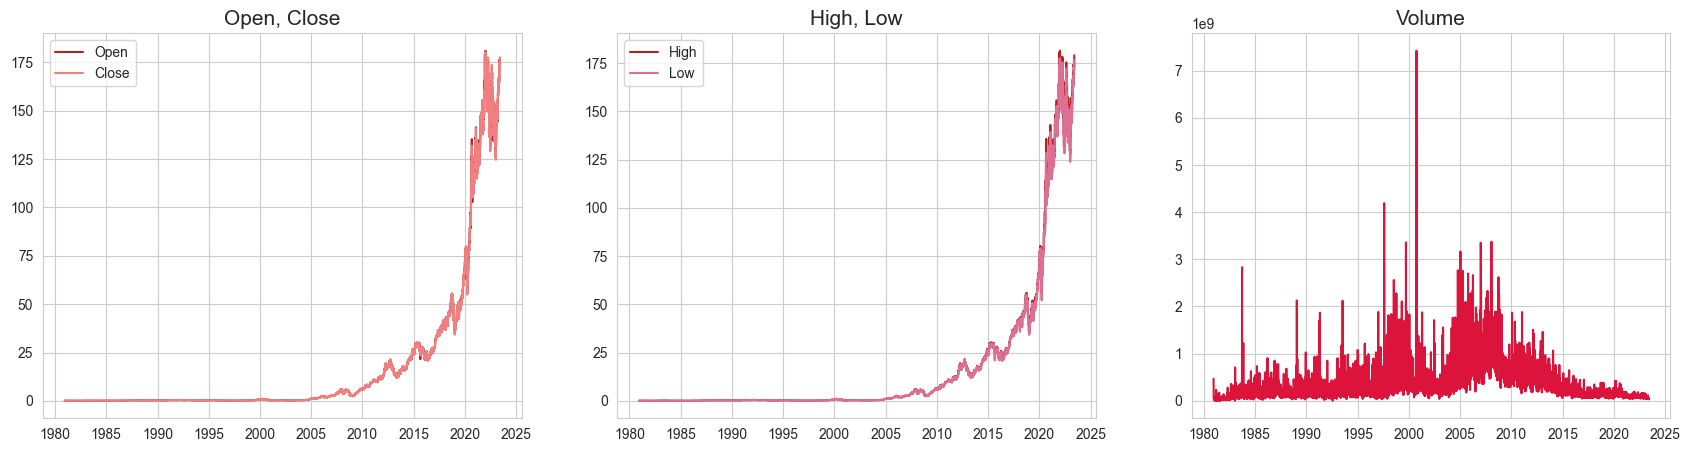

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

axes[0].plot(df['Open'], color='firebrick', label='Open')
axes[0].plot(df['Close'], color='lightcoral', label='Close')
axes[0].set_title('Open, Close', fontsize=15)
axes[0].legend()

axes[1].plot(df['High'], color='firebrick', label='High')
axes[1].plot(df['Low'], color='palevioletred', label='Low')
axes[1].set_title('High, Low', fontsize=15)
axes[1].legend()

axes[2].plot(df['Volume'], color='crimson')
axes[2].set_title('Volume', fontsize=15)

plt.show()

### Daily price changes

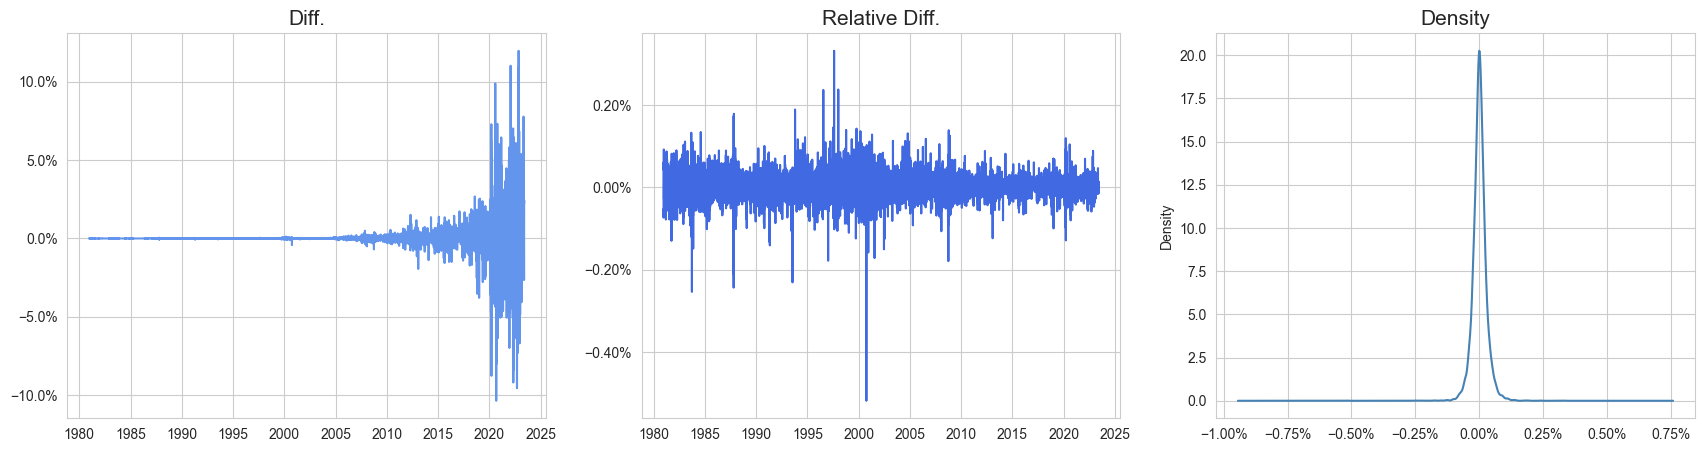

In [7]:
import matplotlib.ticker as mtick
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

axes[0].plot(df['Close'] - df['Close'].shift(1), color='cornflowerblue')
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[0].set_title('Diff.', fontsize=15)

axes[1].plot((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1), color='royalblue')
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_title('Relative Diff.', fontsize=15)

((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).plot(kind='density', ax=axes[2], color=['steelblue'])
axes[2].xaxis.set_major_formatter(mtick.PercentFormatter())
axes[2].set_title('Density', fontsize=15)

plt.show()

### Additional features

In [8]:
# Bollinger Bands
df['SMA_20'] = df['Close'].rolling(20).mean()
df['STD_20'] = df['Close'].rolling(20).std()
df['Upper_Band'] = df['SMA_20'] + (df['STD_20'] * 2)
df['Lower_Band'] = df['SMA_20'] - (df['STD_20'] * 2)

# Relative Strength Index (RSI)
delta = df['Close'].diff()
SMA_U = delta.where(delta > 0, 0).rolling(14).mean()
SMA_D = -delta.where(delta < 0, 0).rolling(14).mean()
df['RSI'] = 100 - (100 / (1 + SMA_U / SMA_D))

# MACD
df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
df['MACD_Signal'] = df['MACD'].ewm(span=9).mean()

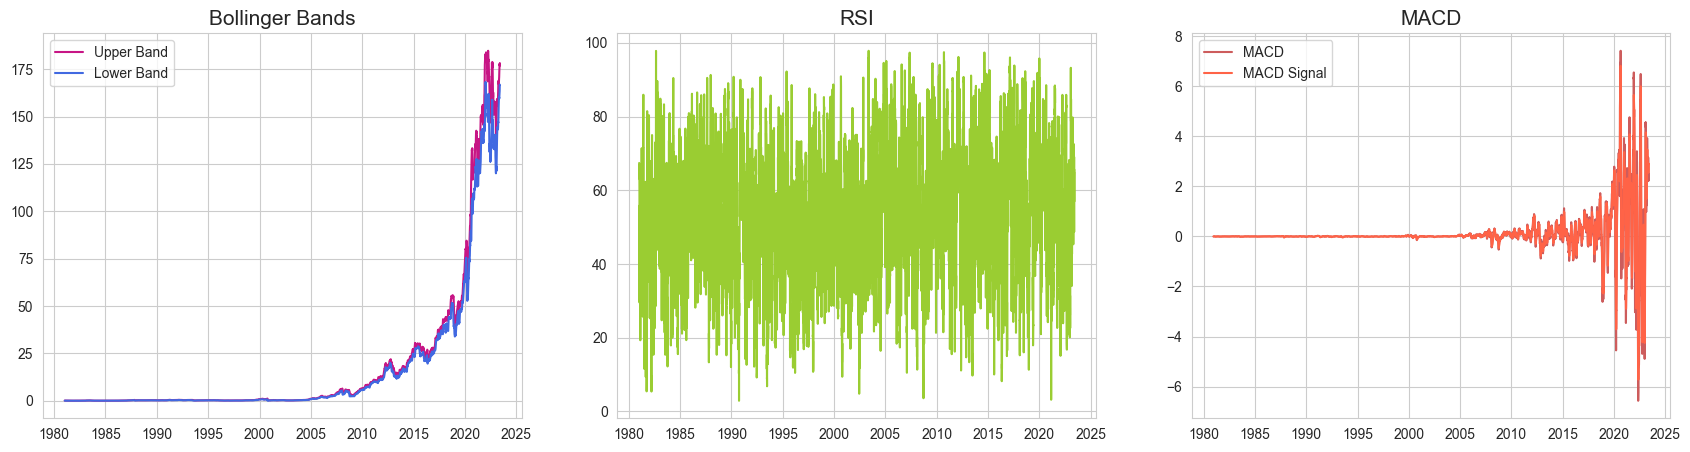

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

axes[0].plot(df['Upper_Band'], color='mediumvioletred', label='Upper Band')
axes[0].plot(df['Lower_Band'], color='royalblue', label='Lower Band')
axes[0].set_title('Bollinger Bands', fontsize=15)
axes[0].legend()

axes[1].plot(df['RSI'], color='yellowgreen')
axes[1].set_title('RSI', fontsize=15)

axes[2].plot(df['MACD'], color='indianred', label='MACD')
axes[2].plot(df['MACD_Signal'], color='tomato', label='MACD Signal')
axes[2].set_title('MACD', fontsize=15)
axes[2].legend()

plt.show()

### Correlation Heatmap

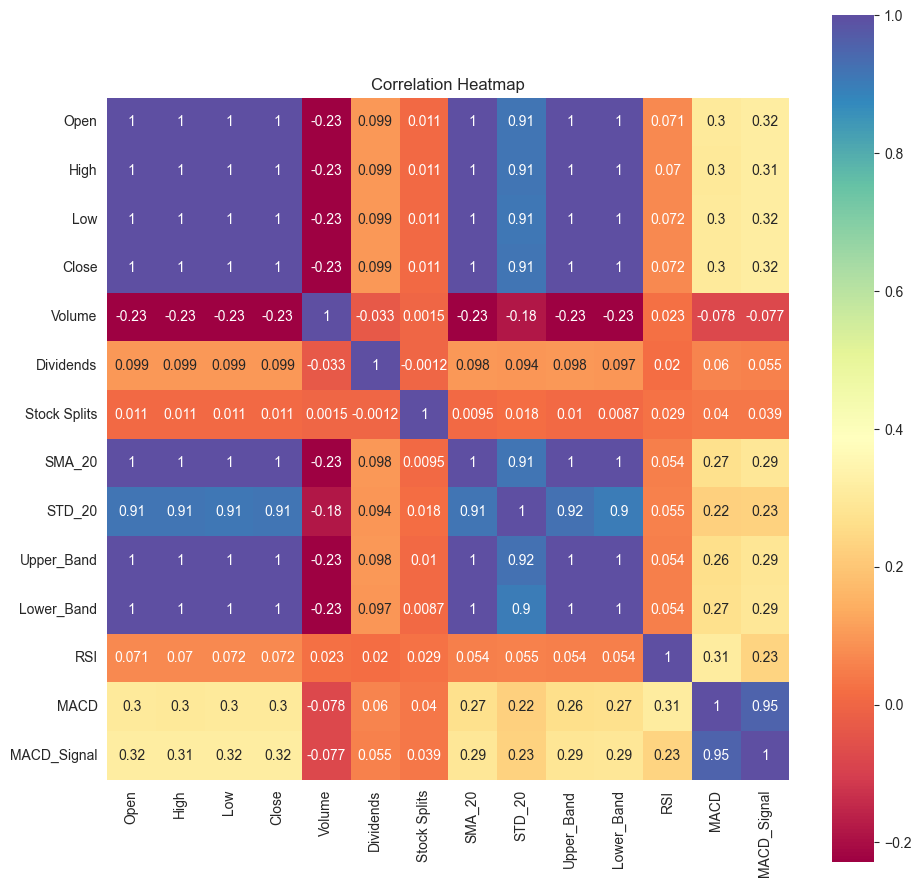

In [10]:
import matplotlib.pyplot as pyplot
pyplot.figure(figsize=(11, 11))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', square=True)
plt.title('Correlation Heatmap')
plt.show()

### Pairplot against Target value

In [11]:
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

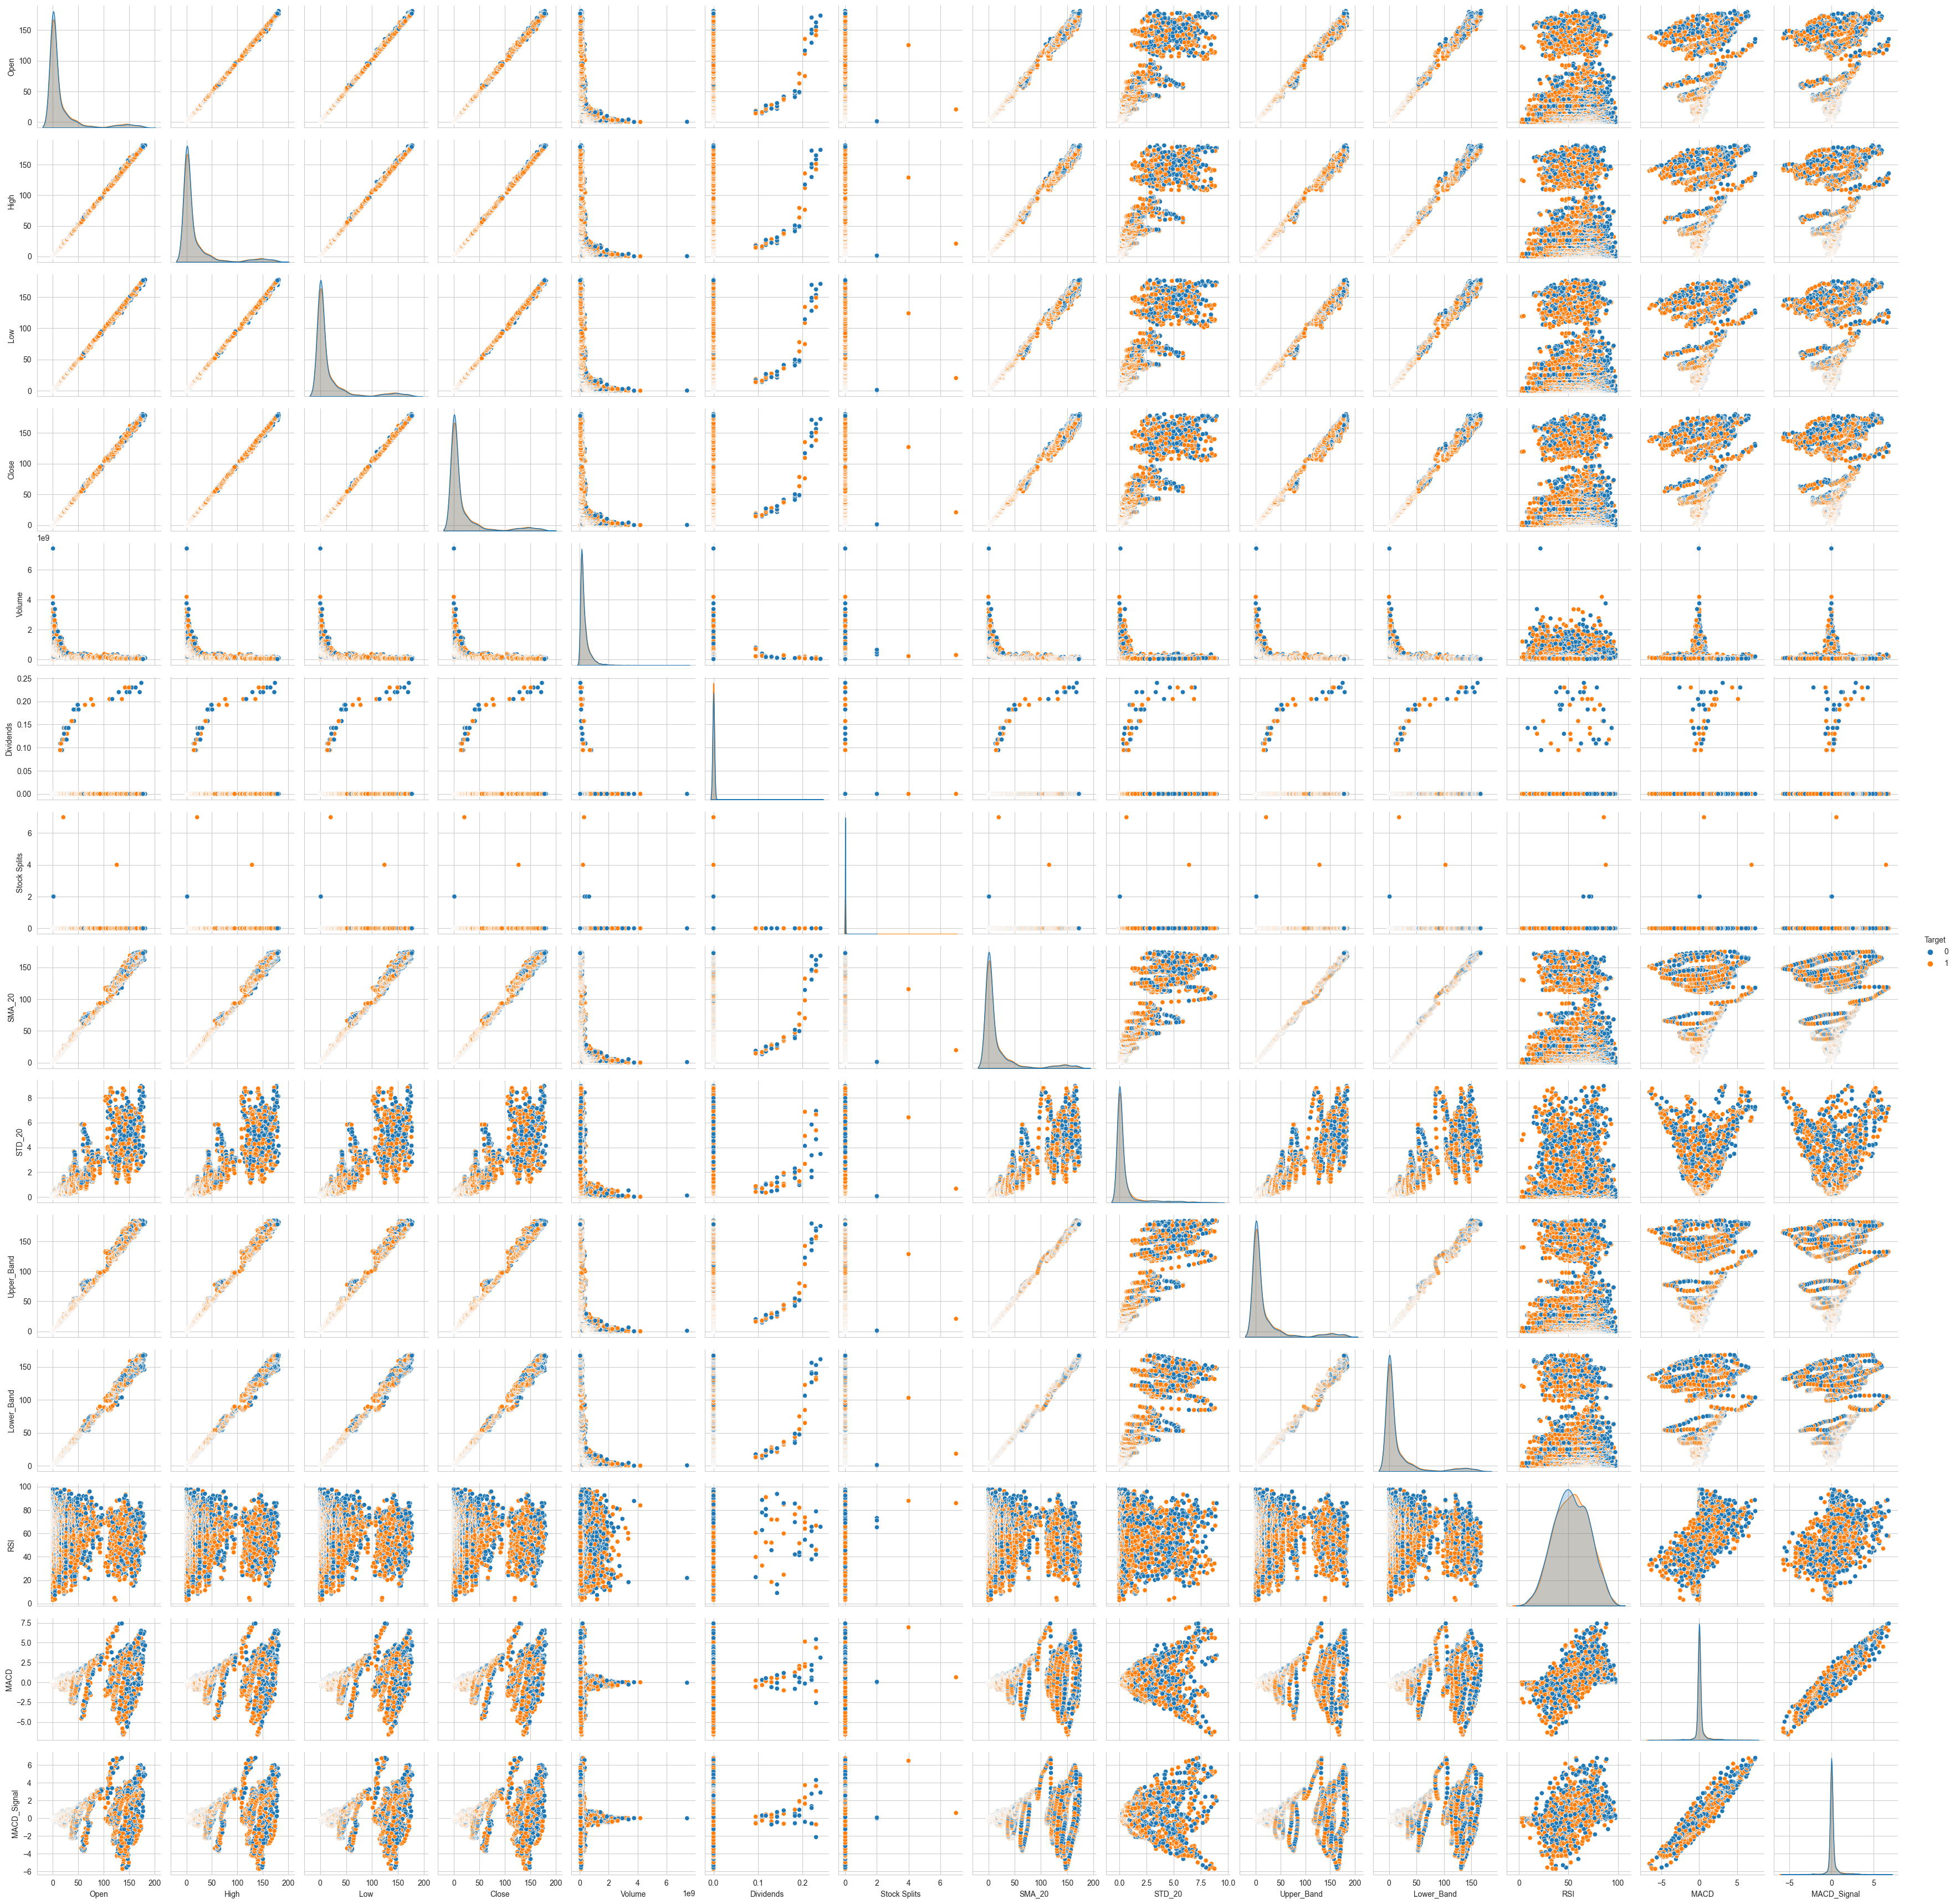

In [12]:
sns.pairplot(df, hue='Target')